<a href="https://colab.research.google.com/github/KwanF/cali-ml-model/blob/main/Machine_Learning_Model_with_Linear_Regression_on_California_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro


This is a dataset obtained from the StatLib repository. Here is the included description:

S&P Letters Data
We collected information on the variables using all the block groups in California from the 1990 Cens us. In this sample a block group on average includes 1425.5 individuals living in a geographically co mpact area. Naturally, the geographical area included varies inversely with the population density. W e computed distances among the centroids of each block group as measured in latitude and longitude. We excluded all the block groups reporting zero entries for the independent and dependent variables. The final data contained 20,640 observations on 9 variables. The dependent variable is ln(median house value).

The file contains all the the variables. Specifically, it contains median house value, median income, housing median age, total rooms, total bedrooms, population, households, latitude, and longitude in that order.
Reference
Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297

Source: https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

 # Import the required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

# Load the California Housing DataSet from scikit-learn

In [ ]:
from sklearn.datasets import fetch_california_housing
cali_housing_dataset = fetch_california_housing()

# cali_housing_dataset is a dictionary
# let's check what it contains

print(cali_housing_dataset.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [ ]:
cali_housing_dataset.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

# Load the data into pandas dataframe

In [ ]:
cali = pd.DataFrame(cali_housing_dataset.data, columns=cali_housing_dataset.feature_names)
cali.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
var = fetch_california_housing()

**The target values is missing from the data. Create a new column of target values and add it to dataframe**

In [ ]:
cali['MEDV'] = cali_housing_dataset.target 

# Data preprocessing

In [ ]:
# check for missing values in all the columns
cali.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

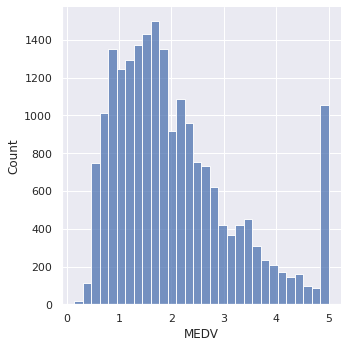

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.displot(cali['MEDV'], bins=30)
plt.show()

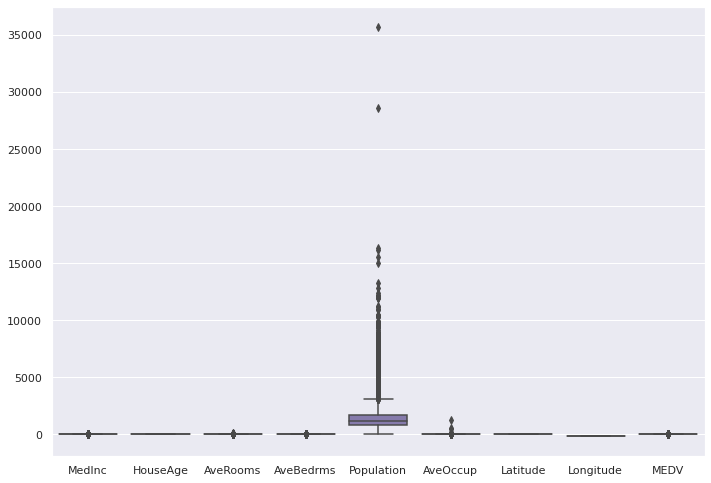

In [ ]:
sns.boxplot(data=cali, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None)

# Correlation matrix

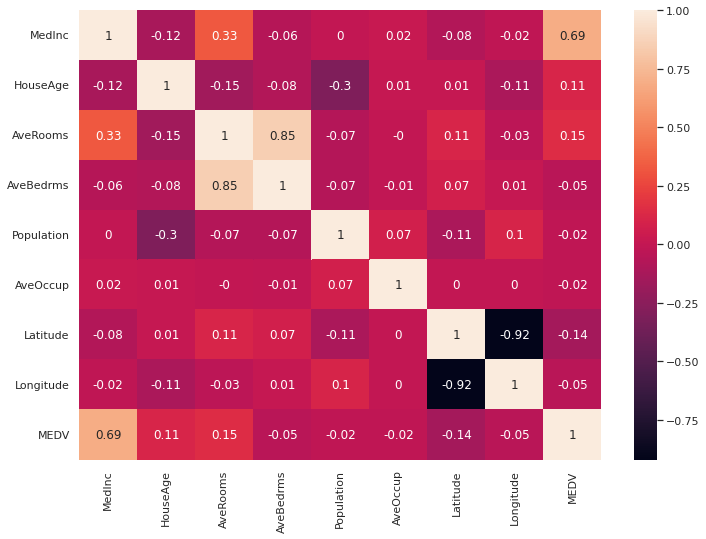

In [ ]:
# compute the pair wise correlation for all columns  
correlation_matrix = cali.corr().round(2)

# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Observations

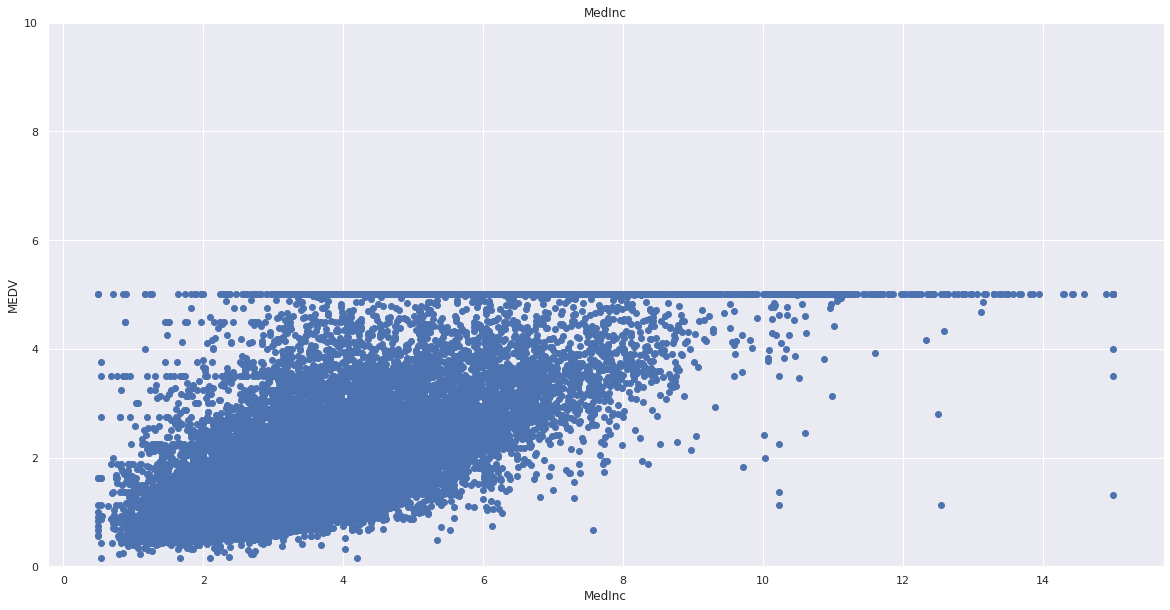

In [ ]:
plt.figure(figsize=(20, 10))

features = ['MedInc']
target = cali['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = cali[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.ylim(0, 10)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Prepare the data for training

In [ ]:
X = pd.DataFrame(np.c_[cali['MedInc']], columns = ['MedInc'])
Y = cali['MEDV']

# Split the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 1)
(4128, 1)
(16512,)
(4128,)


# Train the model using sklearn LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

# Training Set Results

In [ ]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 0.8359223196455023
R2 score is 0.4703942846392545




# Testing Set Results

In [ ]:
# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
     

The model performance for testing set
--------------------------------------
RMSE is 0.8430087153316839
R2 score is 0.48490837623606453
